# Global Sea Level Predictor 2000-2050

This is the final project in freeCodeCamp's Data Analysis with Python Certification which uses the Global Average Absolute Sea Level Change (1880-2014) dataset from the US Environmental Protection Agency. Link to the data [here](https://datahub.io/core/sea-level-rise). Given environmental concerns about rising sea levels and its consequences such as the displacement of millions of animals and humans, I believe this is a problem that we can no longer ignore. I use standard linear regression models to create a forecast for the period starting in 2000 and ending in 2050. 

### Instructions
You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from epa-sea-level.csv.
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

###  Graphing the Data and Making the Regression Models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('https://raw.githubusercontent.com/cr2230/sea-level-predictor/main/epa-sea-level.csv')
    
    # Inches to cm conversion: 1 inch = 2.54 cm
    df['CSIRO Adjusted Sea Level'] = df['CSIRO Adjusted Sea Level'] * 2.54
    df['Lower Error Bound'] = df['Lower Error Bound'] * 2.54
    df['Upper Error Bound'] = df['Upper Error Bound'] * 2.54

    # Create scatter plot
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    r1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    plt.plot(range(1880,2051), r1.slope * range(1880,2051) + r1.intercept, label = 'Historical Sea Level')

    # Create second line of best fit
    r2 = linregress(df.query('Year >= 2000')['Year'], df.query('Year >= 2000')['CSIRO Adjusted Sea Level'])
    plt.plot(range(2000,2051),
             r2.slope * range(2000,2051) + r2.intercept,
             color = 'red',
             linestyle = 'dashed',
             label = 'Year 2000+ Forecast')
    
    # Plotting the upper and lower bounds for the second line of best fit
    upper = linregress(df.query('Year >= 2000')['Year'], df.query('Year >= 2000')['Upper Error Bound'])
    lower = linregress(df.query('Year >= 2000')['Year'], df.query('Year >= 2000')['Lower Error Bound'])
    
    plt.plot(range(2000,2051),
             upper.slope * range(2000,2051) + upper.intercept,
             color = 'black',
             linestyle = 'dotted')
    
    plt.plot(range(2000,2051),
             lower.slope * range(2000,2051) + lower.intercept,
             color = 'black',
             linestyle = 'dotted')
    
    forecast_2050 = round(r2.slope * 2050 + r2.intercept, 2)
    forecast_2023 = round(r2.slope * 2023 + r2.intercept, 2)
    
    plt.plot(2050, forecast_2050, 'co', label = '2050 = {val} cm'.format(val = forecast_2050))
    plt.plot(2023, forecast_2023, 'bo', label = '2023 = {val} cm'.format(val = forecast_2023))
    
    # Add labels and title
    plt.title('Rise in Global Sea Level')
    plt.ylabel('Sea Level (cm)')
    plt.xlabel('Year')
    plt.legend()
        
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot:title={'center':'Rise in Global Sea Level'}, xlabel='Year', ylabel='Sea Level (cm)'>

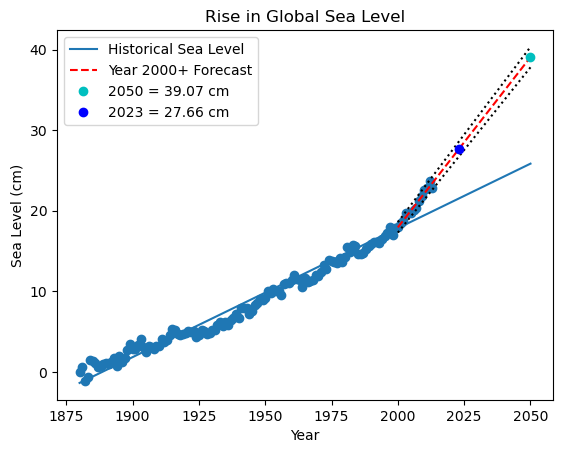

In [2]:
draw_plot()

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/cr2230/sea-level-predictor/main/epa-sea-level.csv')
df['CSIRO Adjusted Sea Level'] = df['CSIRO Adjusted Sea Level'] * 2.54
r1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
r2 = linregress(df.query('Year >= 2000')['Year'], df.query('Year >= 2000')['CSIRO Adjusted Sea Level'])
print(r1.slope, r2.slope)

0.16013324339082233 0.4227252742629452


From the fitted values above, this is particularly worrying as there is a 41.25% increase in global sea levels. It can also be observed that the historical data from 1880-2014 has a slope of 0.16, whereas modern data and the forecasts from 2000-2050 have a slope of 0.42. This is a stark difference and represents a 262.5% increase, which implies that the modern age has significantly increased the rate at which sea levels are rising. It can be hypothesized that the rate at which sea levels are rising will continue to increase. This is because the growth rates for both technology and population imply that developing economies will essentially grow to modern ones. As economies transition and grow, their consumption increases as people start to have more disposable income. Additionally, a growing population ultimately means more consumption and resource demand as humans require resources such as food and energy to survive.

One drawback about this project is that only sea level data is analyzed. Although sea levels have been increasing, it is uknown how much of that is attributed to humans. Future projects on this topic could use linear regression models to assess the relationships between rising sea levels, nature related variables such as the temperature of the sun, and human related variables such as CO2 emissions or economic growth rates. This would provide insight on the magnitude of these variables on rising sea levels as well as communicate how strongly correlated they are. This would contribute to the current debate in the scientific community as some scientists posit that climate change is a natural phenomenon, whereas their opposition would say that it is an artifical phenomenon caused by humans. 